# **CODSOFT INTERNSHIP**

**TASK-5: Credit Card Fraud Detection**

Author: Rajnandini

Domain: Data Science

Batch: November-24


In [11]:
# Import libraries for data processing and modeling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
from matplotlib import rcParams
import warnings
from google.colab import files


In [12]:
df = pd.read_csv('creditcard.csv')

In [13]:
df = df.sample(n=50000, random_state=1)

In [14]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
196117,131364.0,0.077197,0.482928,-2.234233,-1.309124,2.386570,3.392581,-0.156385,1.353569,-0.047112,...,0.060865,-0.060530,0.379575,0.598853,-0.878618,0.254859,-0.088550,-0.023446,69.90,0
24533,33274.0,-0.958584,1.109086,1.558159,0.878707,1.914559,1.564757,1.300978,0.074098,-1.376977,...,0.155271,0.657607,-0.296222,-1.053362,0.006475,-0.058981,-0.528679,-0.374450,6.55,0
13629,24158.0,-0.992899,1.430204,1.071256,1.363127,0.116315,0.217868,0.208391,0.319128,1.483134,...,-0.258903,-0.104189,-0.100144,-0.369103,-0.068048,-0.266731,0.080402,-0.034571,1.00,0
246673,153276.0,-1.143693,-0.250983,1.013022,-0.671080,1.363438,0.312673,0.786158,-0.089323,-0.272429,...,-0.094134,-0.137349,-0.047086,0.058485,0.825118,0.316019,-0.377194,-0.246404,84.15,0
91842,63649.0,0.555043,-0.099484,-0.102234,-0.624145,1.484364,4.154536,-1.242699,0.286054,0.694670,...,0.649935,-0.578303,0.057823,1.026542,0.440906,0.303285,0.146932,0.172708,17.24,0


In [15]:
df.shape

(50000, 31)

In [16]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
127467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
137900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21513,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
134700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62648,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [22]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,66585.885246,9236.025982,9234.366485,9238.057527,9242.094312,9237.830204,9239.823996,9240.024318,9238.352980,9241.288268,...,9240.716762,9240.828983,9238.731209,9241.819590,9241.306797,9241.795642,9241.345328,9241.325400,10249.400924,9242.003433
std,56437.437294,17603.331882,17604.337340,17602.093448,17599.632121,17602.217105,17601.008871,17600.879582,17601.905366,17600.126024,...,17600.465684,17600.406925,17601.675427,17599.806543,17600.116972,17599.821681,17600.090207,17600.099838,17267.050787,17599.696882
min,0.000000,-46.855047,-63.344698,-31.813586,-5.266509,-42.147898,-23.496714,-26.548144,-33.785407,-8.739670,...,-16.640785,-10.933144,-30.269720,-2.836627,-7.025783,-2.534330,-8.260909,-9.617915,0.000000,0.000000
25%,37060.390471,0.452705,0.283473,0.401402,0.228200,0.163714,0.052944,0.183213,0.117970,0.184868,...,0.051205,0.168696,0.042683,0.153890,0.117679,0.063744,0.029889,0.028720,15.624688,0.000585
50%,62203.968648,5.030706,6.798209,5.069768,6.620166,8.777368,7.313664,9.037413,6.885669,5.569372,...,7.097375,5.032960,6.609194,4.721265,4.887377,4.575448,5.540013,6.034477,2594.720726,4.139800
75%,86678.754113,9103.508364,9103.350177,9104.816202,9107.953292,9106.363522,9106.896361,9107.840230,9105.873233,9107.044958,...,9107.454391,9106.583420,9106.049982,9107.066614,9106.843136,9106.996718,9107.184488,9107.411491,11076.610892,9107.001835
max,172784.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000


In [23]:
df['Class'].value_counts()

,count
Class,
0.000000,2
8.000000,1
6250.130128,1
17677.616953,1
0.000780,1
0.279600,1
50000.000000,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8 non-null      float64
 1   V1      8 non-null      float64
 2   V2      8 non-null      float64
 3   V3      8 non-null      float64
 4   V4      8 non-null      float64
 5   V5      8 non-null      float64
 6   V6      8 non-null      float64
 7   V7      8 non-null      float64
 8   V8      8 non-null      float64
 9   V9      8 non-null      float64
 10  V10     8 non-null      float64
 11  V11     8 non-null      float64
 12  V12     8 non-null      float64
 13  V13     8 non-null      float64
 14  V14     8 non-null      float64
 15  V15     8 non-null      float64
 16  V16     8 non-null      float64
 17  V17     8 non-null      float64
 18  V18     8 non-null      float64
 19  V19     8 non-null      float64
 20  V20     8 non-null      float64
 21  V21     8 non-null      float64
 22  V22  

In [25]:
fraud=df[df['Class']==1]
genuine=df[df['Class']==0]
fraud.Amount.describe()

,Amount
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [32]:
# checking the balance of the database
fraud_count=df['Class'].value_counts()
fraud_rate=100*fraud_count/df.shape[0]
fraud_data=pd.concat([fraud_count,fraud_rate],axis=1).reset_index()
fraud_data.columns=['Class','Count','Percentage']
fraud_data

,Class,Count,Percentage
0,0.000000,2,25.0
1,8.000000,1,12.5
2,6250.130128,1,12.5
3,17677.616953,1,12.5
4,0.000780,1,12.5
5,0.279600,1,12.5
6,50000.000000,1,12.5


In [26]:
genuine.Amount.describe()

,Amount
count,2.000000
mean,9.083125
std,12.845479
min,0.000000
25%,4.541563
50%,9.083125
75%,13.624688
max,18.166250


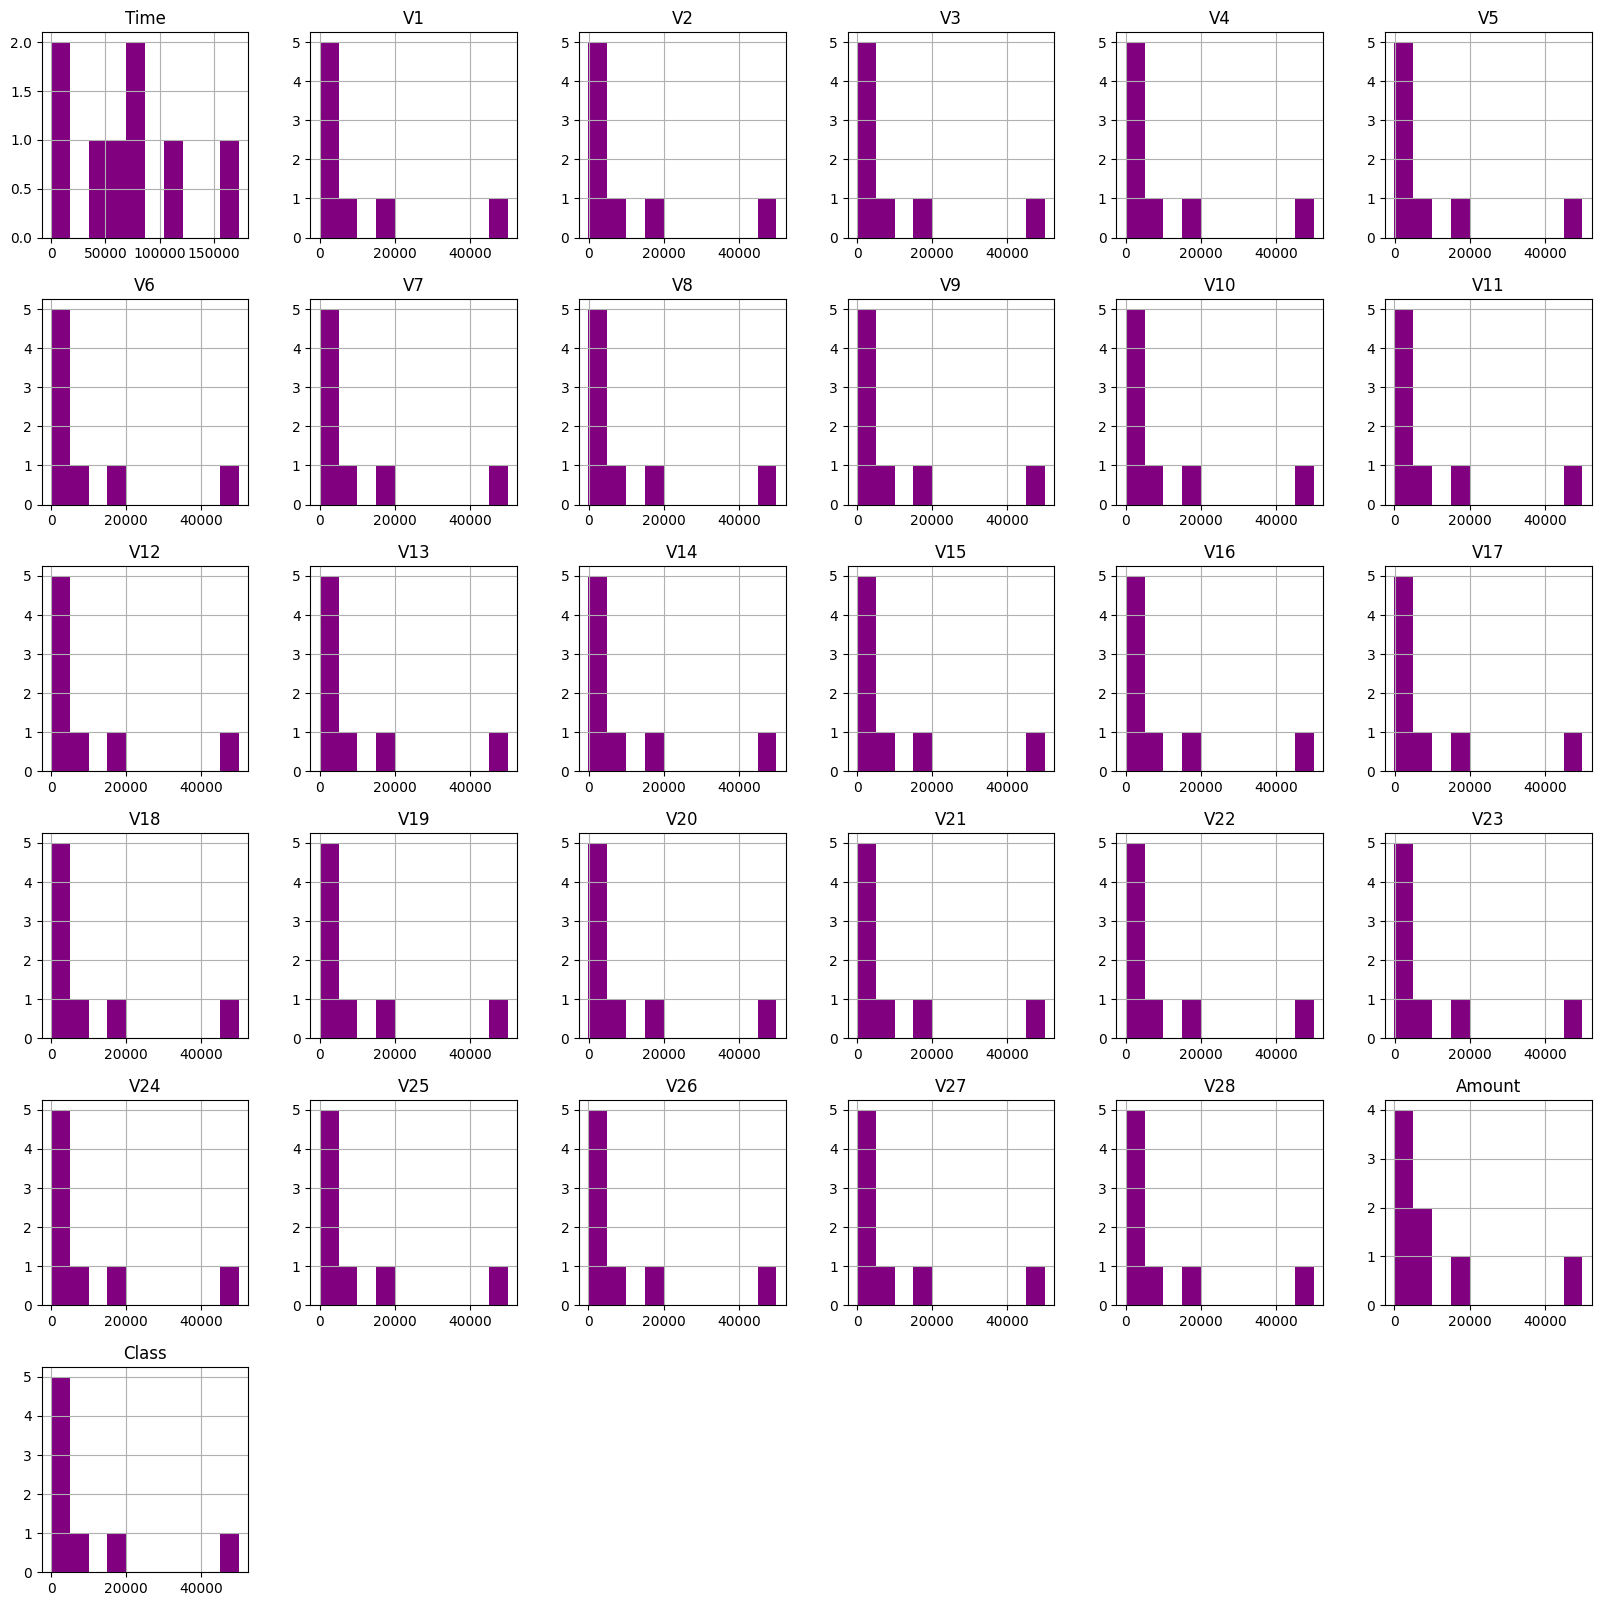

In [27]:
df.hist(figsize=(20,20),color="Purple")
plt.show()

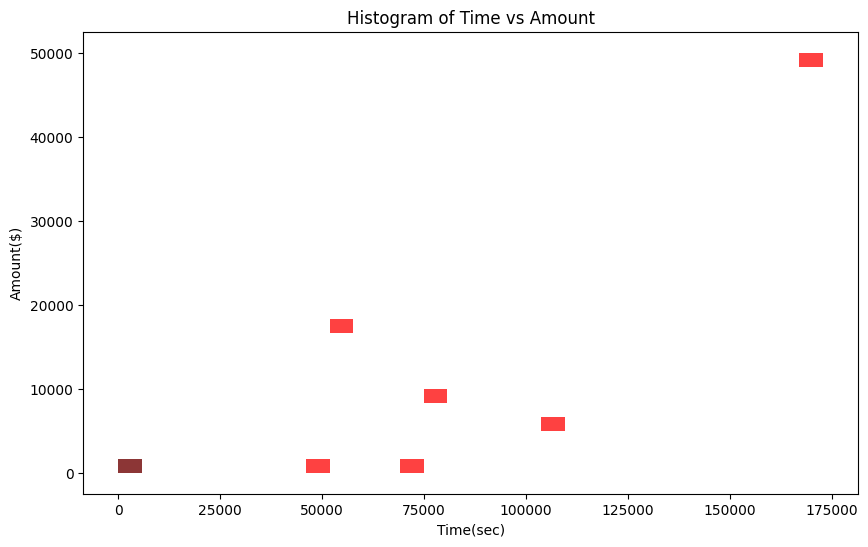

In [50]:
# Assuming 'df' is your DataFrame and it contains 'Time' and 'Amount' columns
plt.figure(figsize=(10, 6))

# Pass your DataFrame to the 'data' argument
sns.histplot(data=df, x='Time', y='Amount', bins=30,color='red')

plt.title('Histogram of Time vs Amount')
plt.xlabel('Time(sec)')
plt.ylabel('Amount($)')
plt.show()

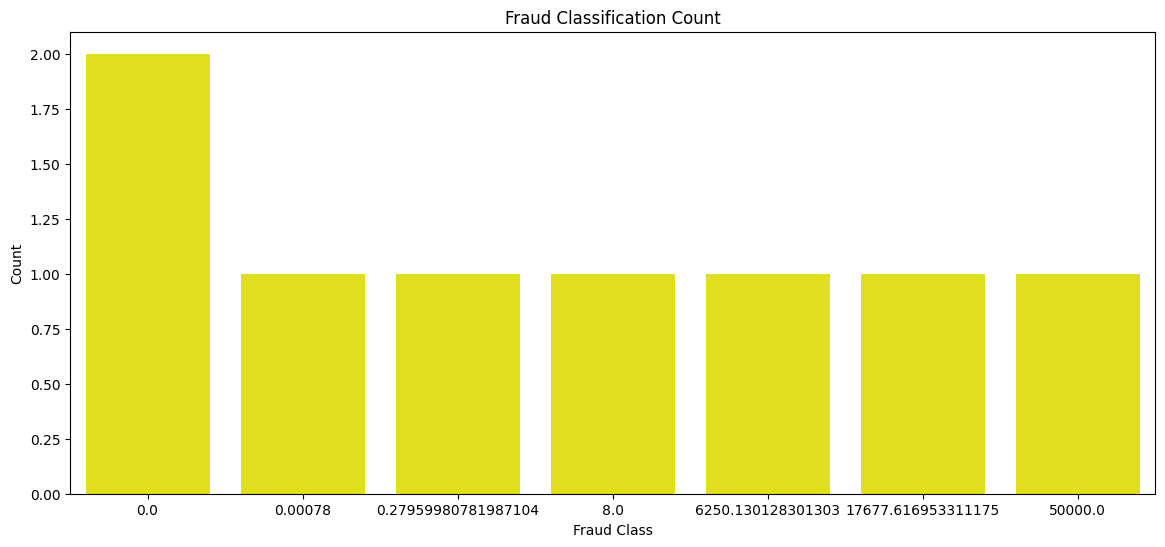

In [44]:
fig=plt.figure(figsize=(14, 6))
sns.countplot(x='Class',data=df,color='Yellow')
plt.xlabel('Fraud Class')
plt.ylabel('Count')
plt.title('Fraud Classification Count')
plt.show()

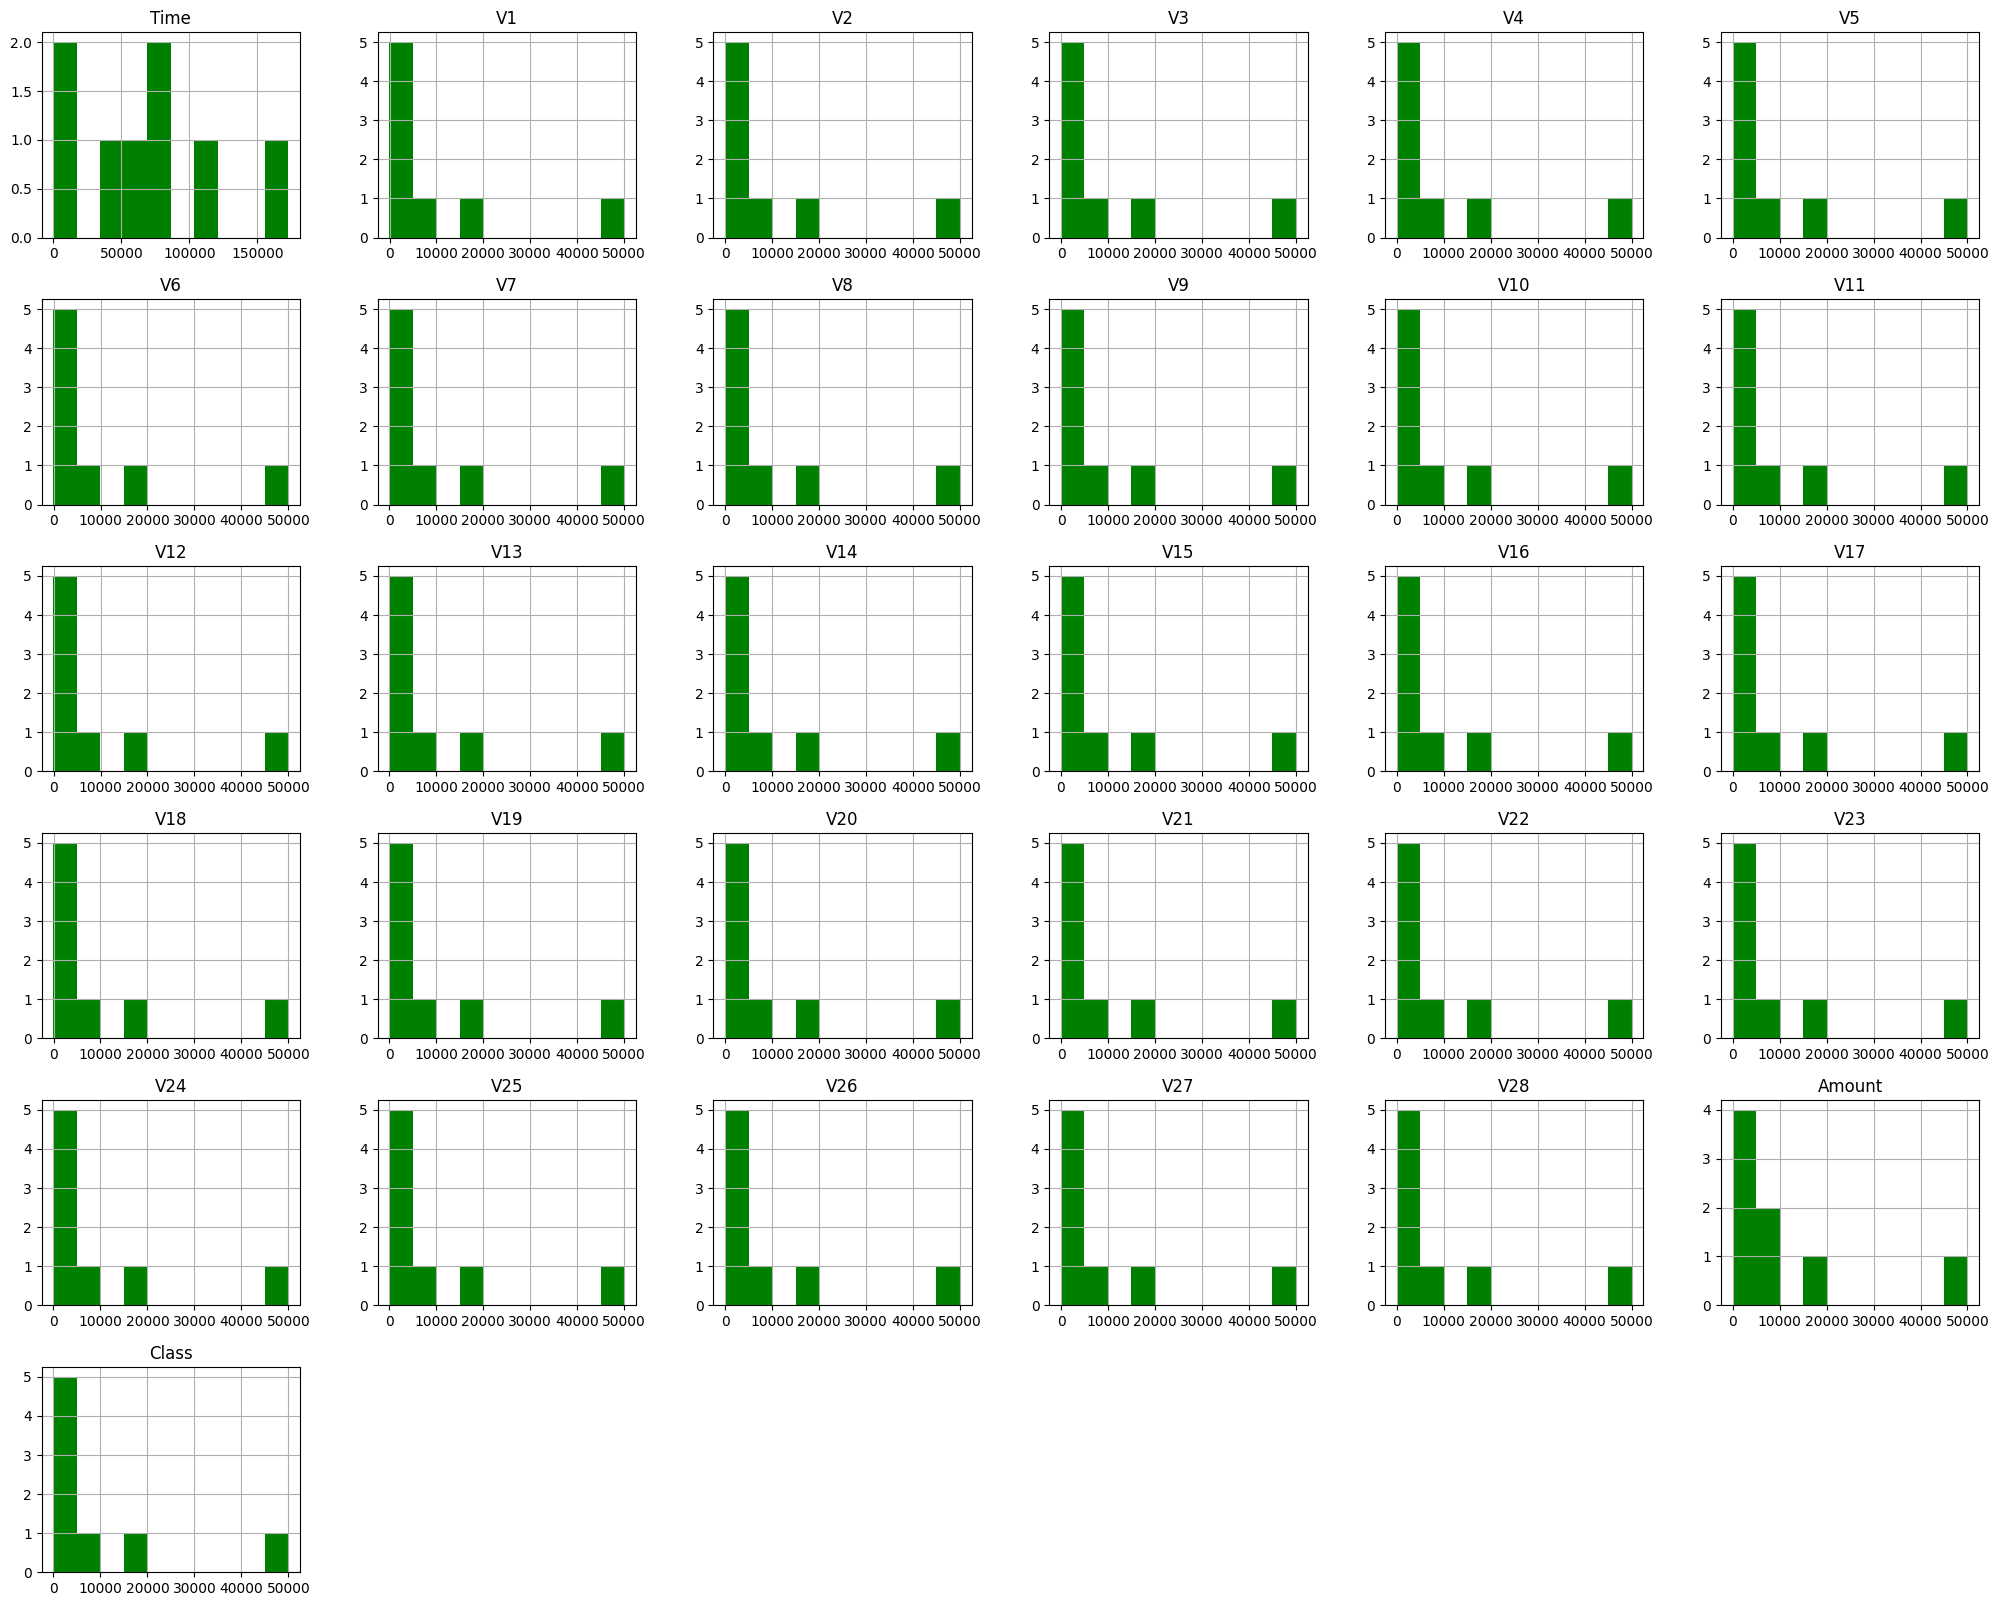

In [43]:
df.hist(figsize=(25,20),color="Green")
plt.show()